In [1]:
 
from fastai import *
from fastai.vision import *
import torch.onnx
from torch.autograd import Variable
import os
os.environ["TORCH_HOME"] = "/media/subhaditya/DATA/COSMO/Datasets-Useful"
 

In [2]:
path = Path("/media/subhaditya/DATA/COSMO/Datasets/devnagiri")
 

In [4]:
data = (ImageList.from_folder(path/"dhcd/train")
       .split_by_rand_pct()
        .label_from_folder()
        .transform(get_transforms(),size = 64)
       ).databunch(bs = 64).normalize(imagenet_stats)
 

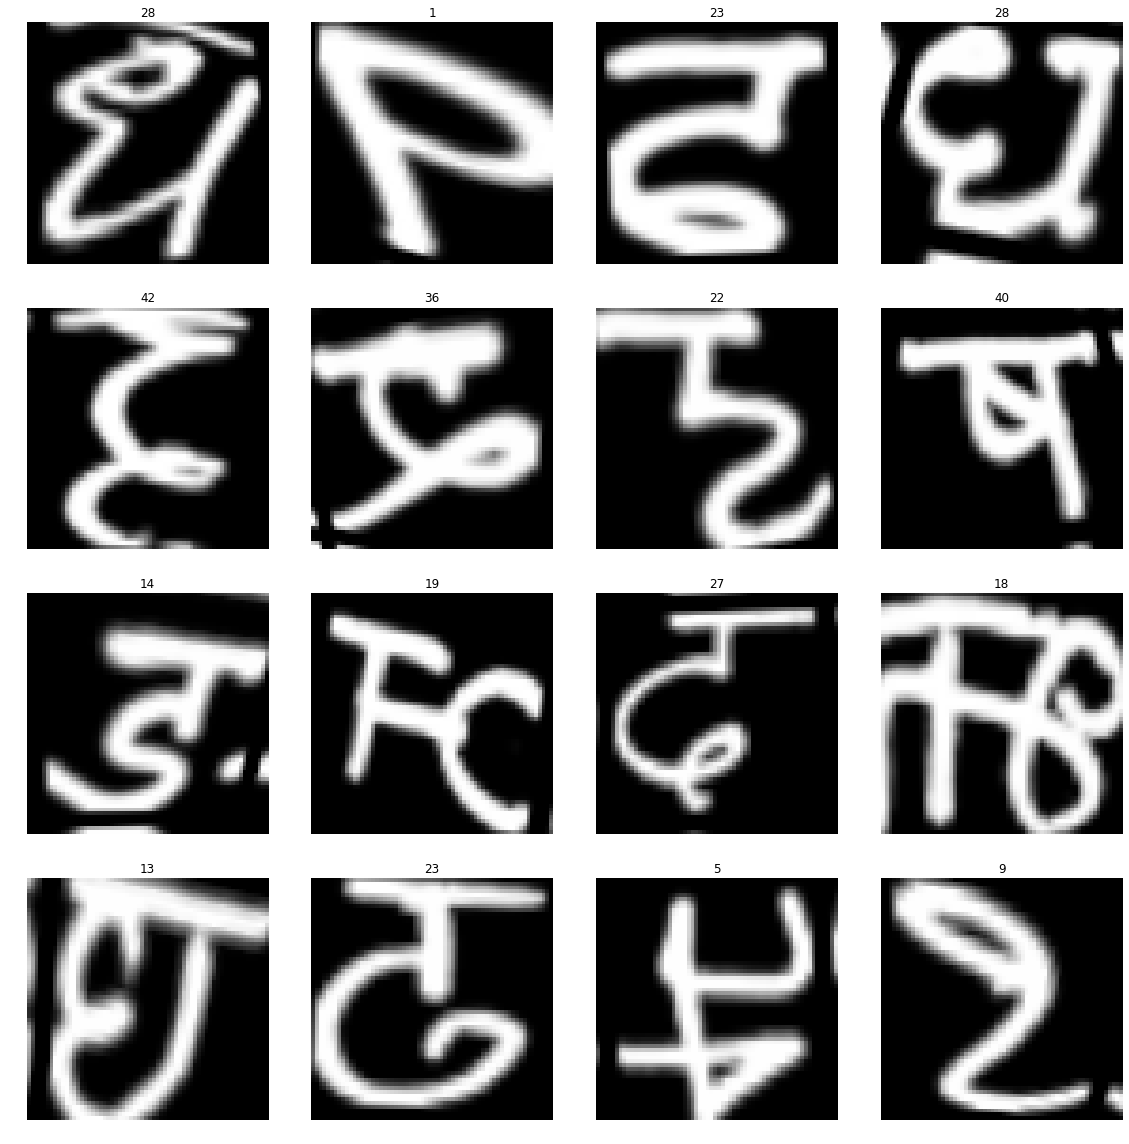

In [5]:
data.show_batch(4)
 

In [6]:
data.c
 

46

In [7]:
learn = None
gc.collect()

31440

In [8]:
learn = cnn_learner(
    data, models.resnet34, metrics=[accuracy], opt_func=AdamW, callback_fns=ShowGraph
).to_fp16()

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


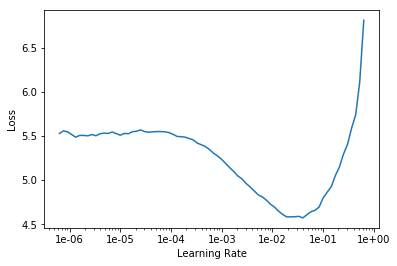

In [9]:
learn.unfreeze()
learn.lr_find()
learn.recorder.plot()

epoch,train_loss,valid_loss,accuracy,time
0,0.422282,0.380152,0.900192,00:56
1,0.333710,0.364517,0.903325,00:52
2,0.238210,0.114069,0.966624,00:50
3,0.151908,0.083296,0.977046,00:51
4,0.119771,0.063968,0.981010,00:54
5,0.090701,0.051774,0.986189,00:55
6,0.056414,0.034499,0.990281,00:51
7,0.035913,0.028103,0.992327,00:50
8,0.019867,0.022035,0.994437,00:50
9,0.015746,0.020308,0.994565,00:53


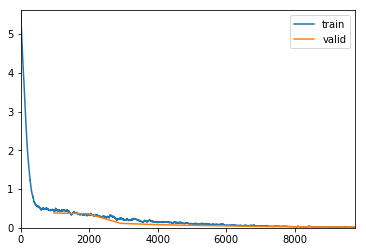

In [10]:
learn.unfreeze()
learn.fit_one_cycle(10, 2e-3, wd = 10e-4)
 

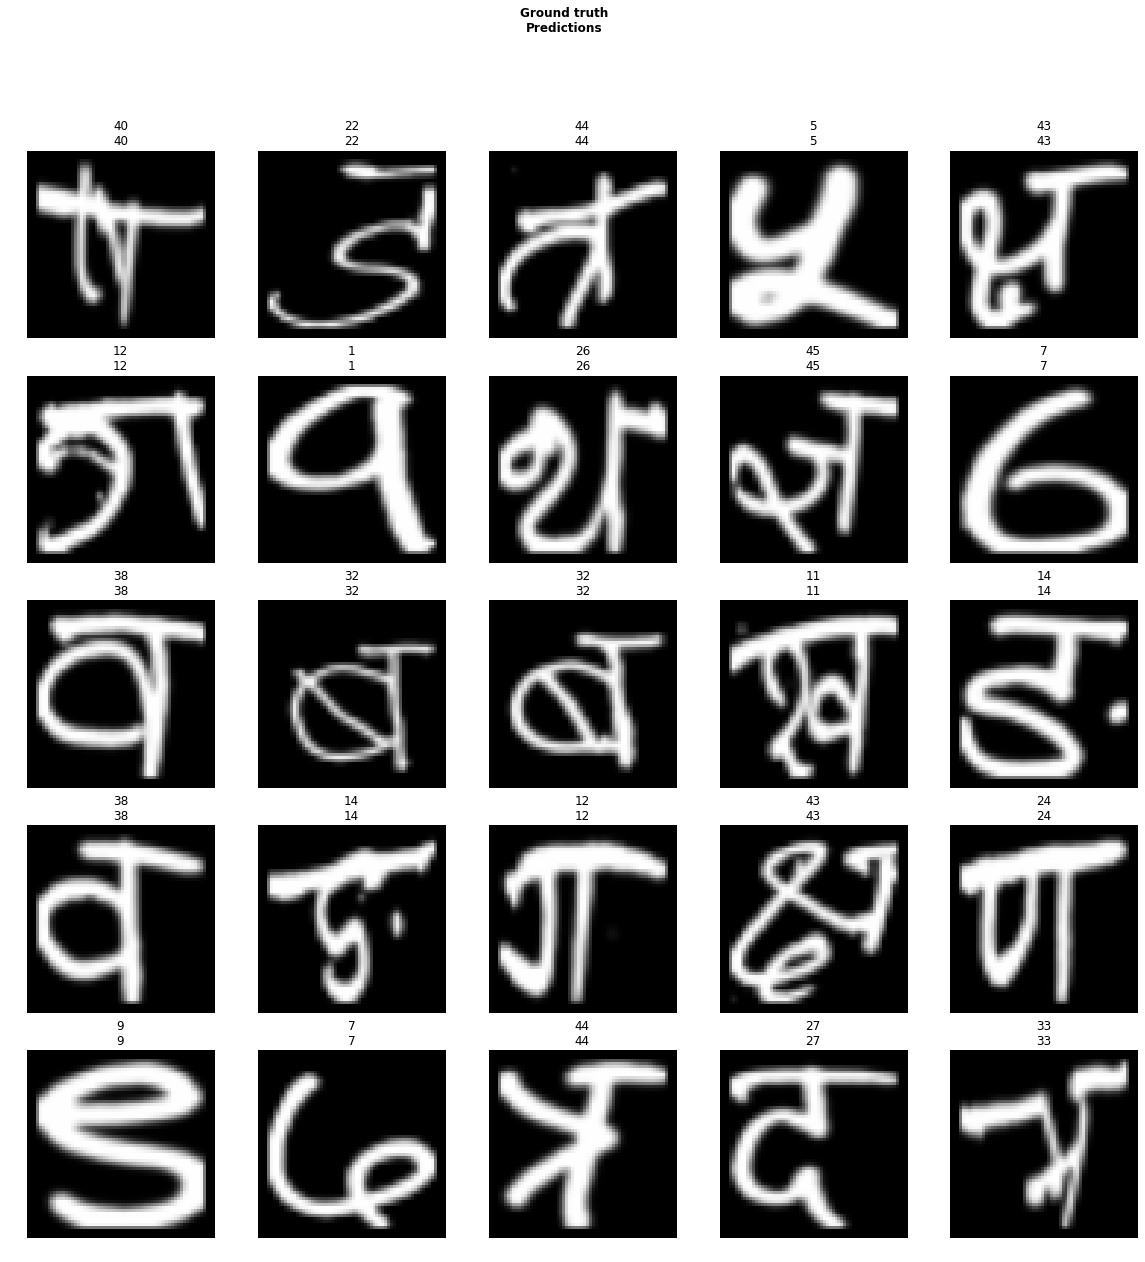

In [11]:
learn.show_results()

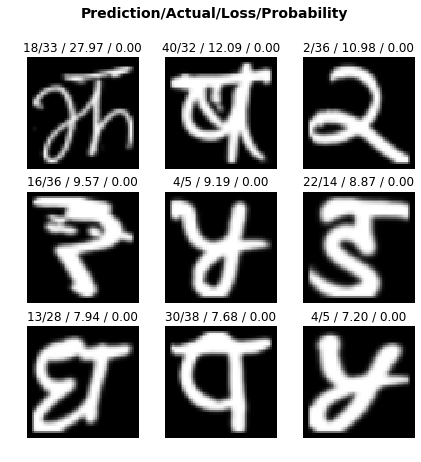

In [12]:
preds,y,losses = learn.get_preds(with_loss=True)
interp = ClassificationInterpretation(learn, preds, y, losses)
interp.plot_top_losses(9, figsize=(7,7))